In [1025]:
#pip install numpy pandas matplotlib seaborn scikit-learn
#pip install plotly

### About Data and Question for this Data

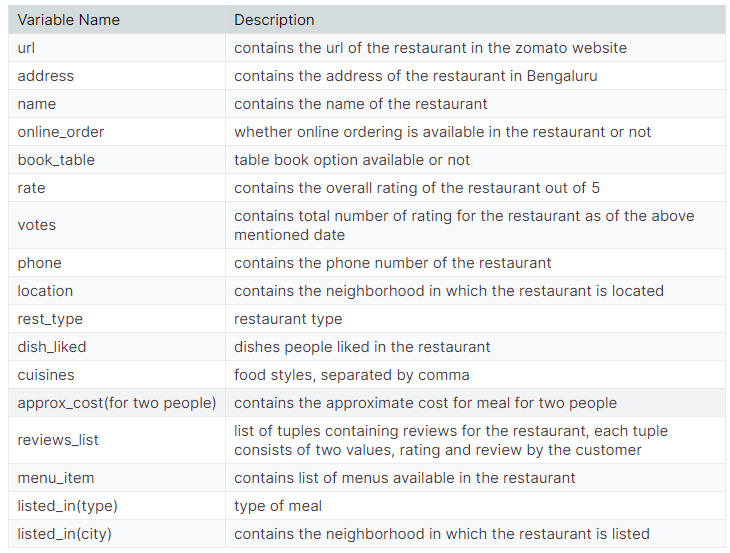ru
Regression Analysis

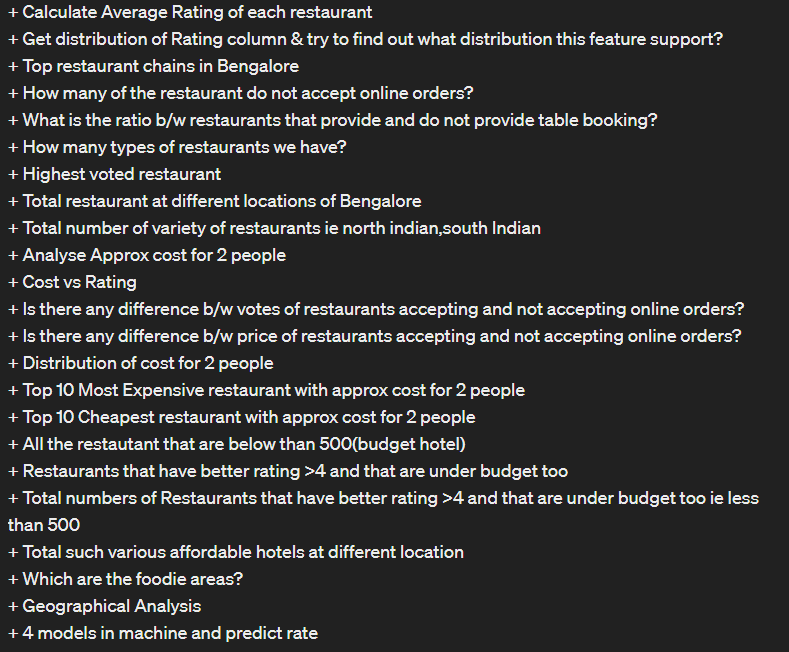Geographical Analysis

### Imports

In [908]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import iplot
#plt.style.use('dark_background')
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the dataset

In [909]:
data=pd.read_csv('zomato.csv')

In [910]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [911]:
data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [912]:
data.shape

(51717, 17)

In [913]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [914]:
zomato_orgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [915]:
data.describe().style.background_gradient(cmap="Wistia")

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [916]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning

In [917]:
len(data['name'].unique())

8792

In [918]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [919]:
#Getting all NAN Features
feature_na=[feature for feature in data.columns if data[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [920]:
null = pd.DataFrame({'Null Values' : data.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isnull().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null.style.background_gradient(cmap="Wistia")

,Null Values,Percentage Null Values
dish_liked,28078,54.291626
rate,7775,15.033741
phone,1208,2.335789
approx_cost(for two people),346,0.669026
rest_type,227,0.438927
cuisines,45,0.087012
location,21,0.040606
listed_in(type),0,0.000000
menu_item,0,0.000000
reviews_list,0,0.000000


In [921]:
# Rate Coulmn
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [922]:
data.dropna(axis='index',subset=['rate'],inplace=True)

In [923]:
data.shape

(43942, 17)

In [924]:
def split(x):
    return x.split('/')[0]

In [925]:
data['rate']=data['rate'].apply(split)

In [926]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [927]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [928]:
data.replace('NEW',0,inplace=True)
data.replace('-',0,inplace=True)
data['rate']=data['rate'].astype(float)

### Visualization

In [929]:
data_rate=data.groupby('name')['rate'].mean().to_frame()
data_rate=data_rate.reset_index()
data_rate.columns=['restaurant','rating']
data_rate.head(10).style.background_gradient(cmap="Wistia")

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


<Axes: xlabel='name'>

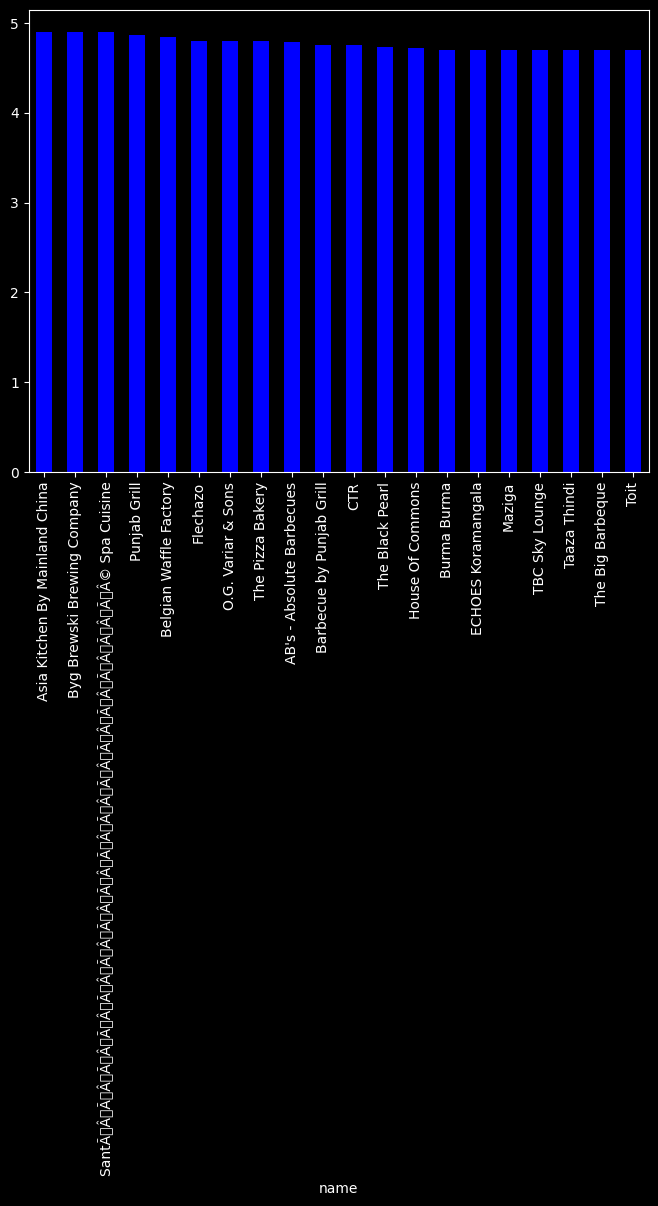

In [930]:
plt.figure(figsize=(8,6))
data.groupby('name')['rate'].mean().nlargest(20).plot.bar(color='blue')

<Axes: xlabel='rating', ylabel='Density'>

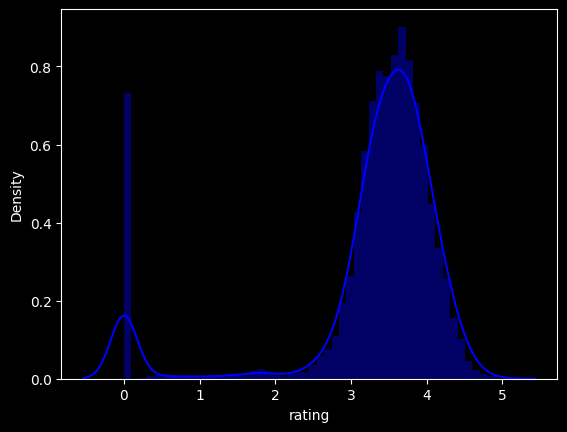

In [931]:
# Get Distribution of Rating Column
sns.set_style()
sns.distplot(data_rate['rating'] ,color='blue')
#Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare

Text(0.5, 0, 'Number of outlets')

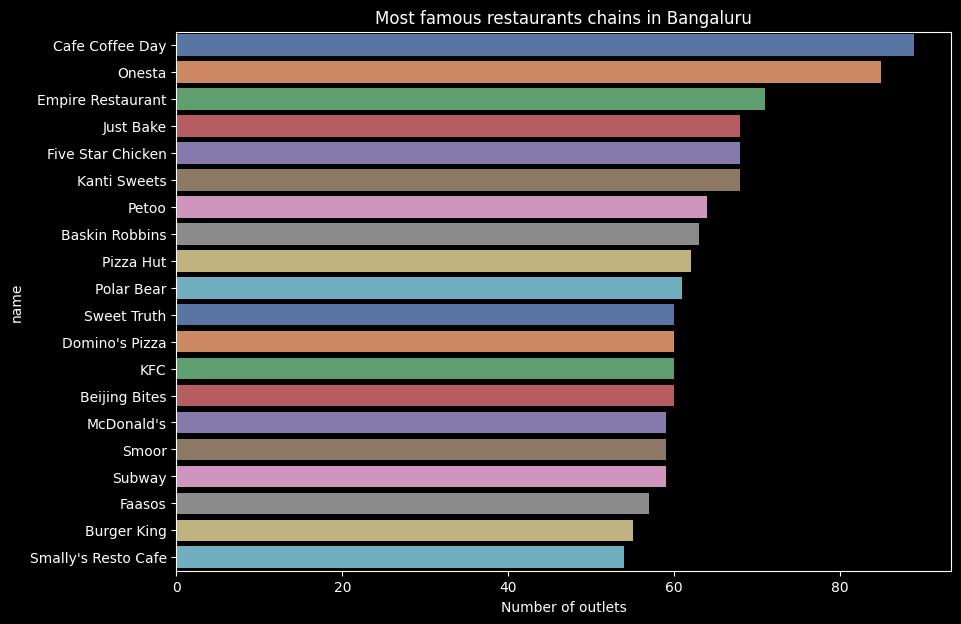

In [932]:
# Top restaurant chains in Bengalore
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

In [933]:
# What is the ratio b/w restaurants that provide and do not provide table booking?
data['rest_type'].isna().sum()

151

In [934]:
data['rest_type'].dropna(inplace=True)
data['rest_type'].isna().sum()

151

In [935]:
len(data['rest_type'].unique())

88

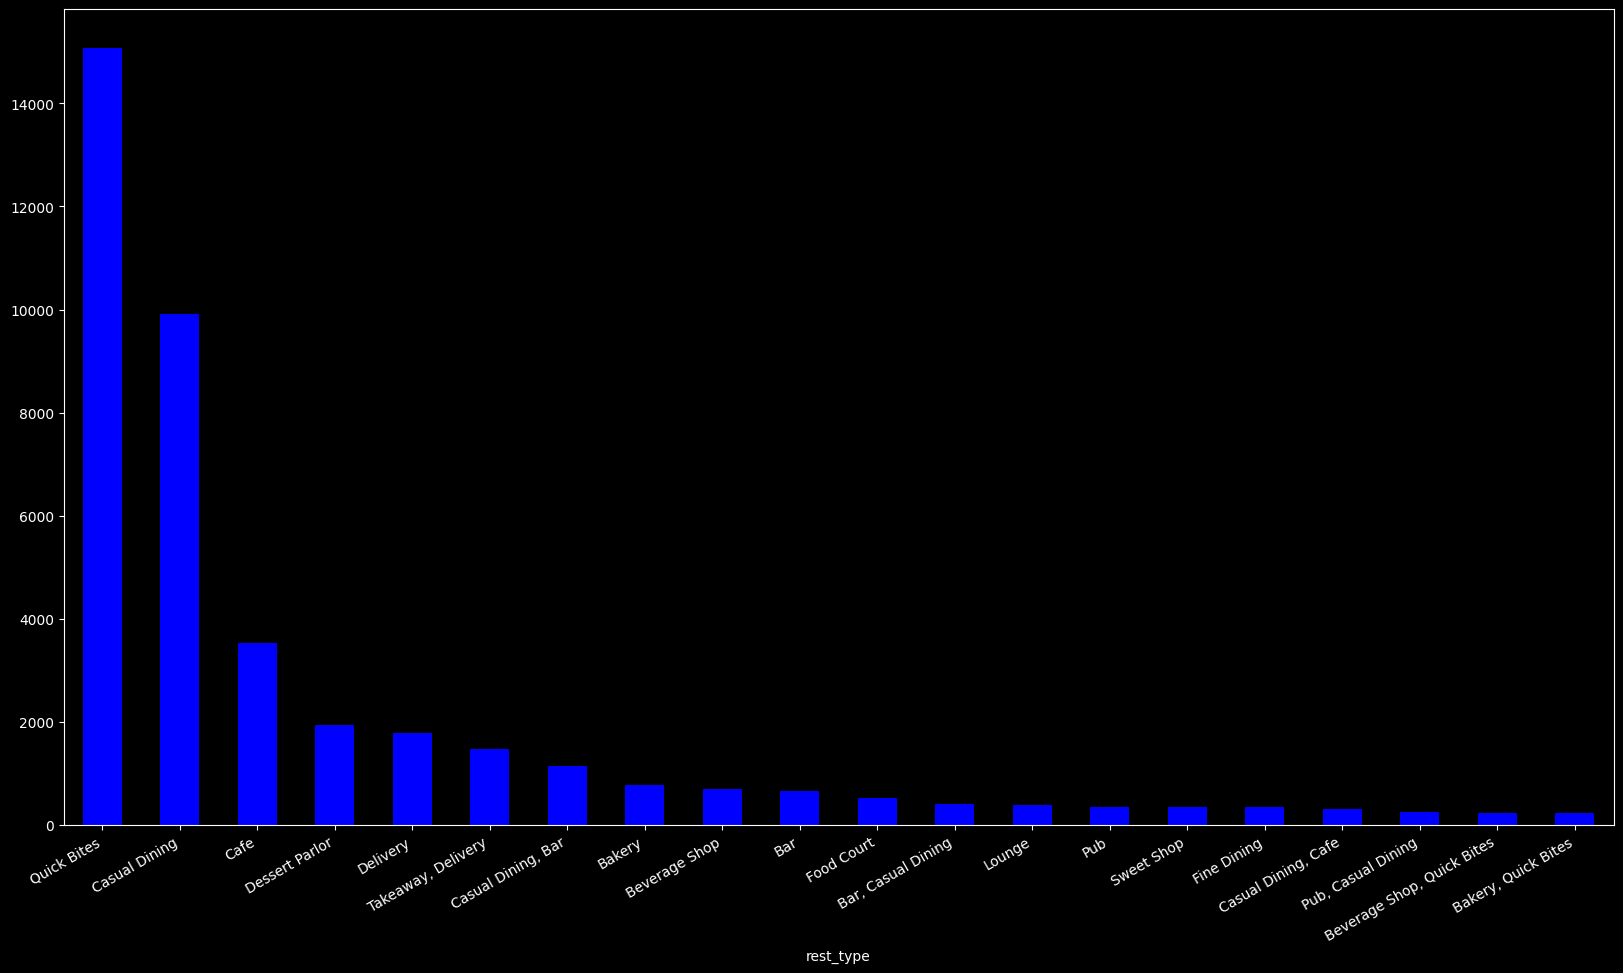

In [936]:
plt.figure(figsize=(20,12))
data['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')
plt.gcf().autofmt_xdate()

At all, Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.

<Axes: xlabel='name'>

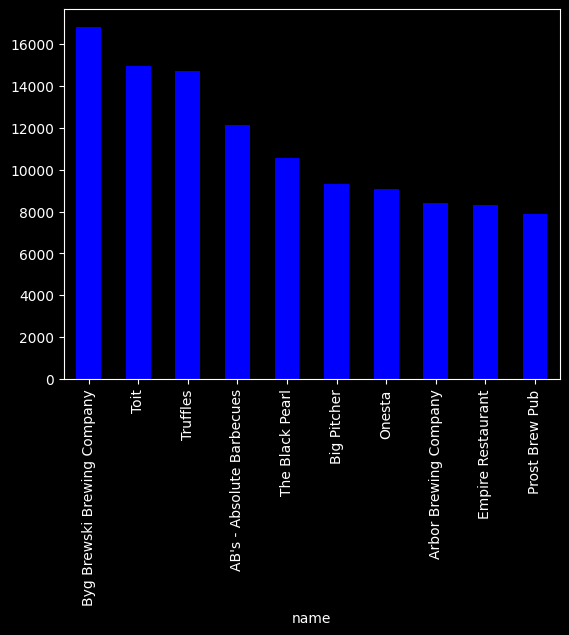

In [937]:
# Highest voted restaurant
data.groupby('name')['votes'].max().nlargest(10).plot.bar(color='blue')

In [938]:
# Total restaurants at different locations of Bengalore
data.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [939]:
restaurant=[]
location=[]
for key,location_df in data.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [940]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<Axes: xlabel='location'>

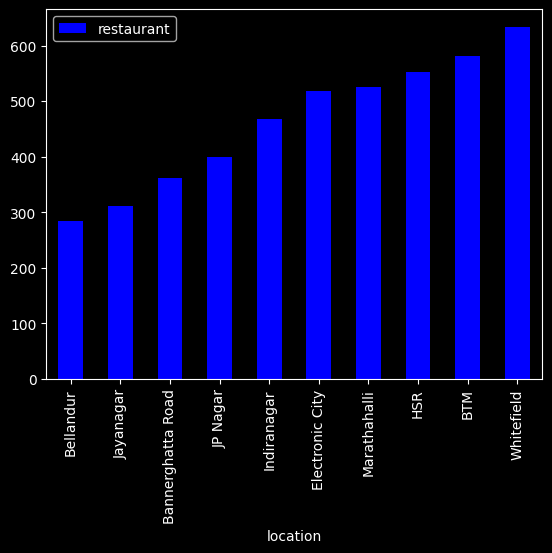

In [941]:
df_total.sort_values(by='restaurant').tail(10).plot.bar(color='blue')

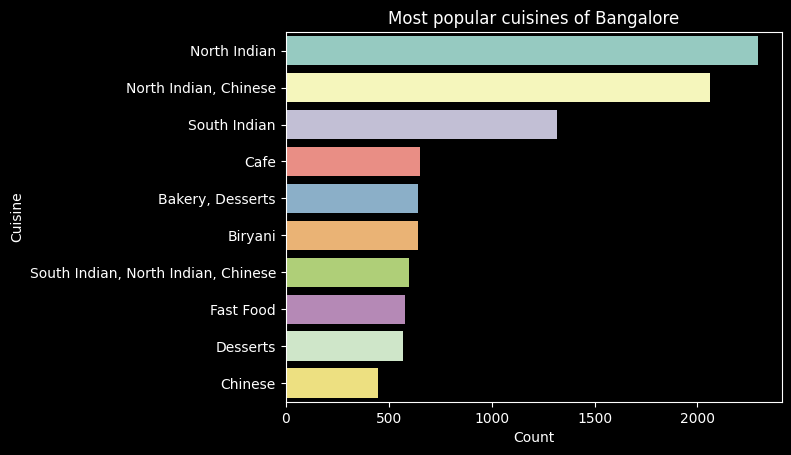

In [942]:
# Total number of variety of restaurants i.e., north indian, south Indian
cuisines = data['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines, y=cuisines.index)
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.title("Most popular cuisines of Bangalore")
plt.show()

In [943]:
# Analyse Approx cost for 2 people
data['approx_cost(for two people)'].isna().sum()

252

In [944]:
data.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)
data['approx_cost(for two people)'].isna().sum()

0

In [945]:
len(data['approx_cost(for two people)'].value_counts())

66

In [946]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [947]:
data['approx_cost(for two people)'].dtype

dtype('O')

In [948]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [949]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(int)

In [950]:
data['approx_cost(for two people)'].dtype

dtype('int32')

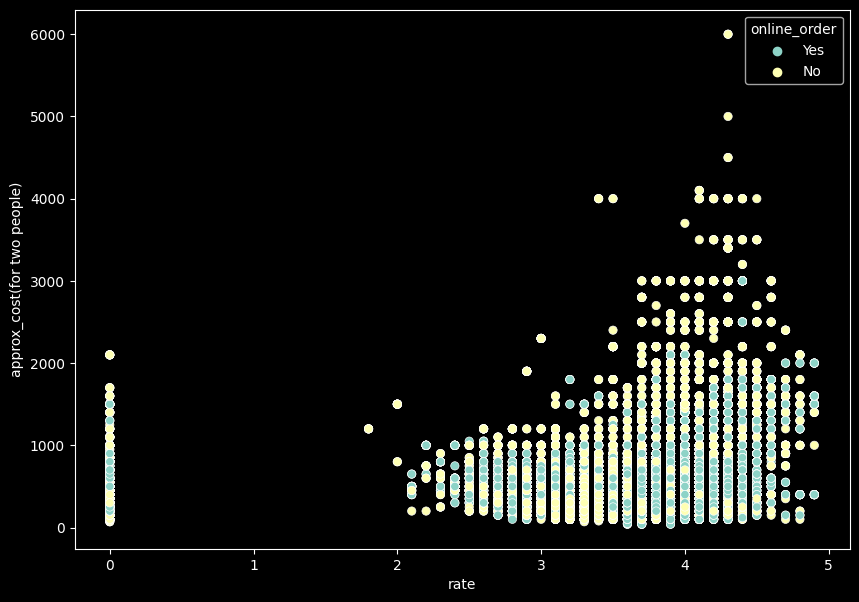

In [951]:
# Cost vs Rating
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=data)
plt.show()

From this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

<Axes: xlabel='online_order', ylabel='votes'>

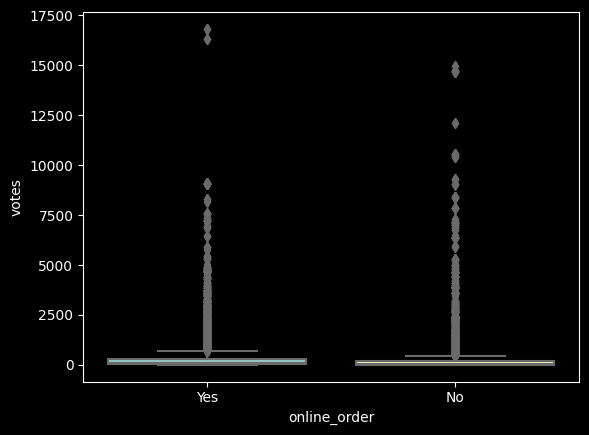

In [952]:
# Is there any difference b/w votes of restaurants accepting and not accepting online orders?
sns.boxplot(x='online_order',y='votes',data=data)

From this boxplot,we can observe that median number of votes for both categories vary.

Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

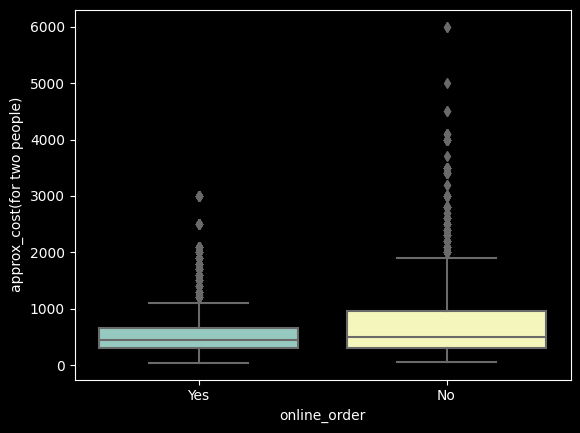

In [953]:
# Is there any difference b/w price of restaurants accepting and not accepting online orders?
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=data)

Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders.

In [954]:
data['approx_cost(for two people)'].max()

6000

In [955]:
data['approx_cost(for two people)'].min()

40

In [956]:
data[data['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [957]:
data[data['approx_cost(for two people)']==40]['name']

5270     Srinidhi Sagar Food Line
12232    Srinidhi Sagar Food Line
14819    Srinidhi Sagar Food Line
17773              Srinidhi Sagar
18891    Srinidhi Sagar Food Line
27091       Srinidhi Sagar Deluxe
29785       Srinidhi Sagar Deluxe
32485              Srinidhi Sagar
Name: name, dtype: object

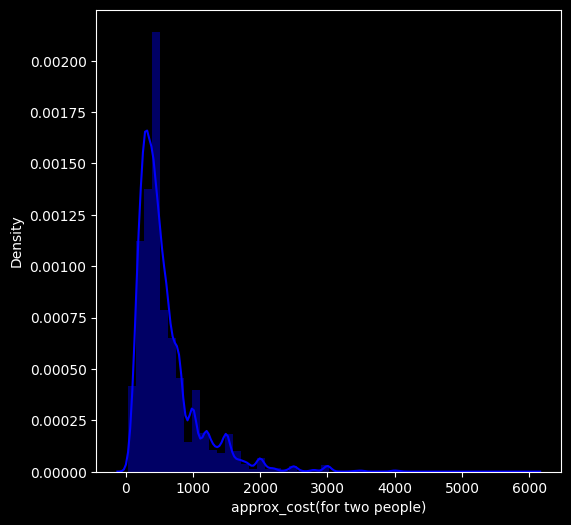

In [958]:
# Distribution of cost for 2 people
plt.figure(figsize=(6,6))
sns.distplot(data['approx_cost(for two people)'] ,color='blue')
plt.show()

<Axes: xlabel='approx_cost(for two people)'>

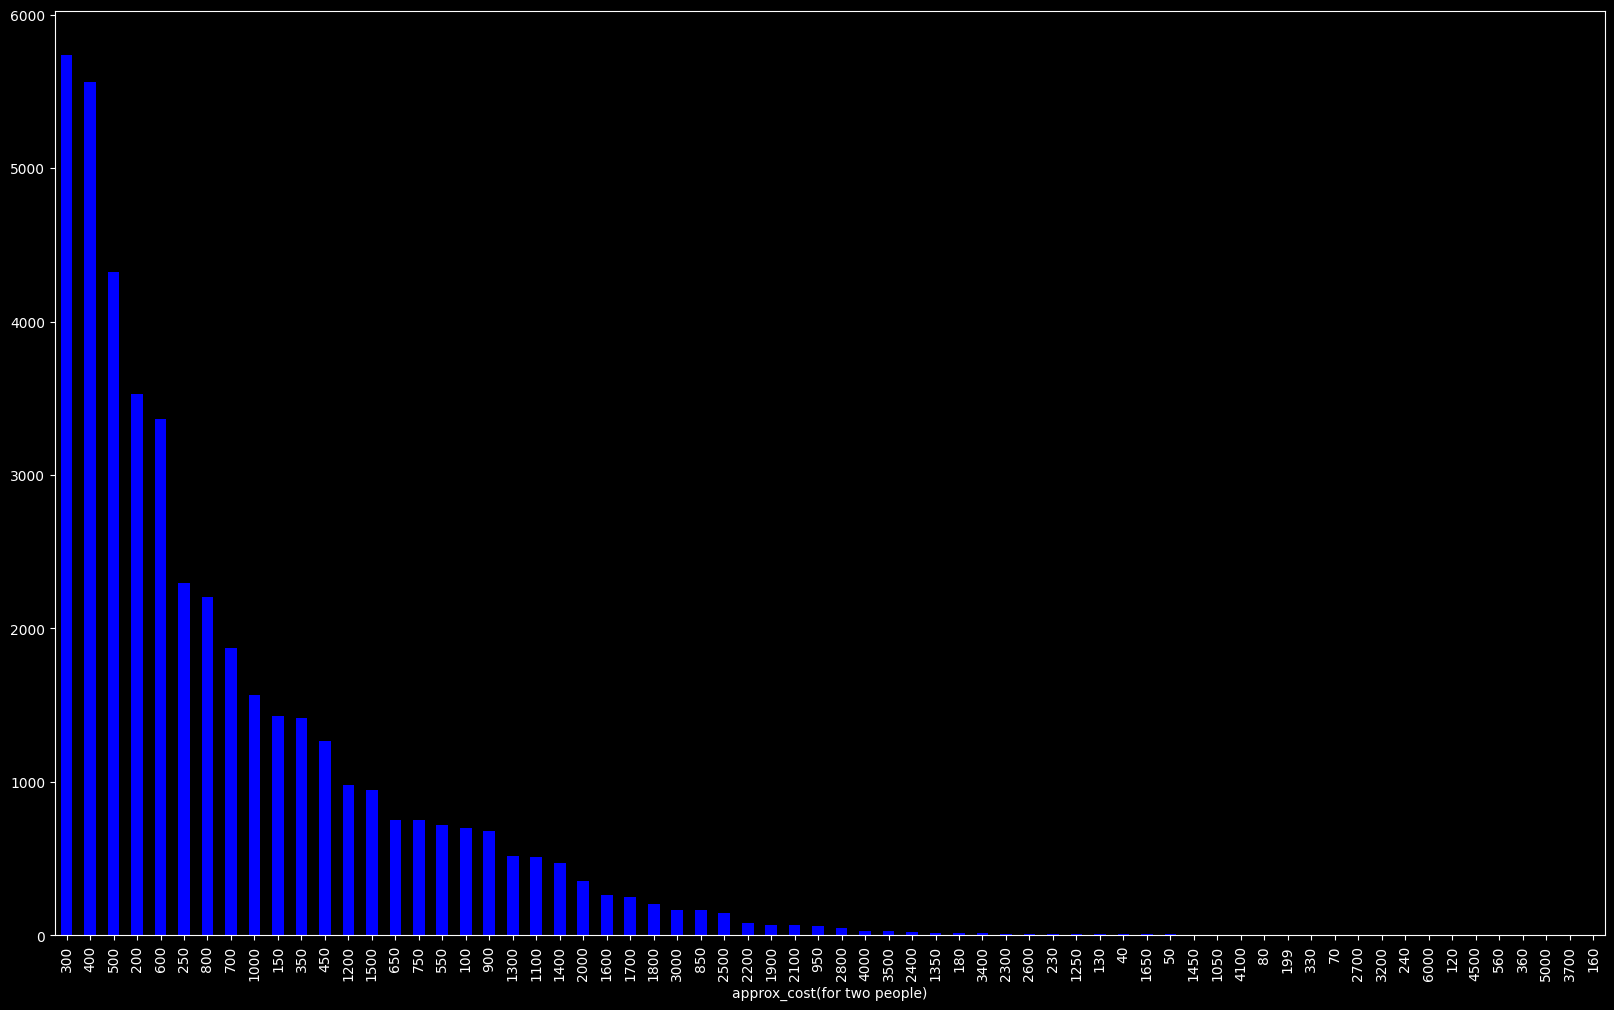

In [959]:
plt.figure(figsize=(20,12))
data['approx_cost(for two people)'].value_counts().plot.bar(color='blue')

Most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious.

In [960]:
data_1=data.copy()

In [961]:
#Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant?
data_1[data_1['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [962]:
data_1.set_index('name',inplace=True)

In [963]:
data_1.head()

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


<Axes: xlabel='name'>

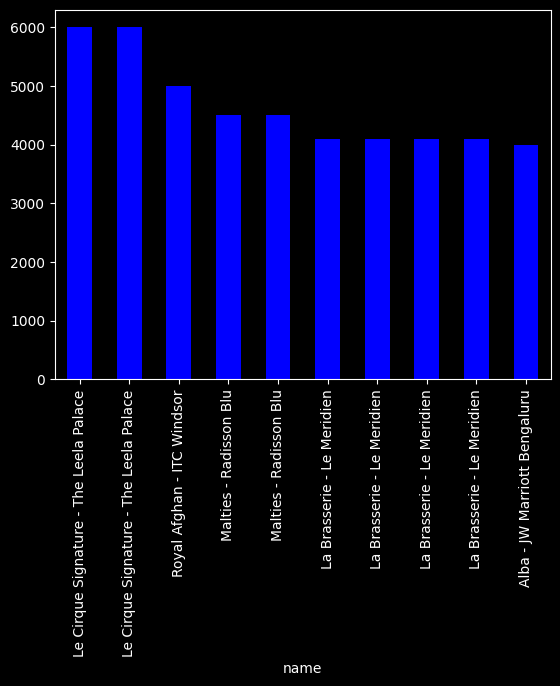

In [964]:
# Top 10 Most Expensive restaurant with approx cost for 2 people
data_1['approx_cost(for two people)'].nlargest(10).plot.bar(color='blue')

<Axes: xlabel='name'>

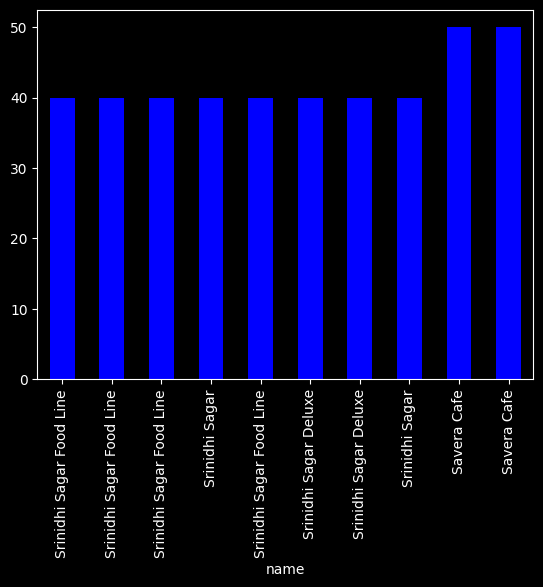

In [965]:
# Top 10 Cheapest restaurant with approx cost for 2 people
data_1['approx_cost(for two people)'].nsmallest(10).plot.bar(color='blue')

In [966]:
# All the restautant that are below than 500(budget hotel)
data_1.set_index('location',inplace=True)
data_1[data_1['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [967]:
df_budget=data_1[data_1['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head().tail(10).style.background_gradient(cmap="Wistia")

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


<Axes: xlabel='approx_cost(for two people)'>

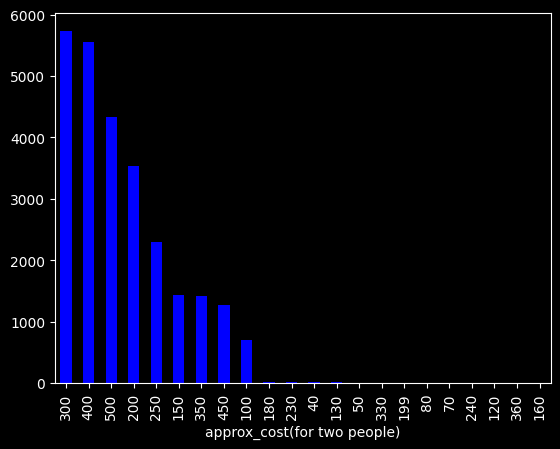

In [968]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar(color='blue')

In [969]:
# Restaurants that have better rating >4 and that are under budget too
data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)].shape

(4007, 17)

In [970]:
# Total numbers of Restaurants that have better rating >4 and that are under budget too ie less than 500
df_new=data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

In [971]:
# Total such various affordable hotels at different location
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
len(location)

68

In [972]:
len(total)

68

In [973]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [974]:
location_df.head(20).tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
City Market,1
Commercial Street,4
Cunningham Road,4
Domlur,5
Ejipura,1
Electronic City,23
Frazer Town,15
HBR Layout,3
HSR,58


Text(0, 0.5, 'Total restaurants')

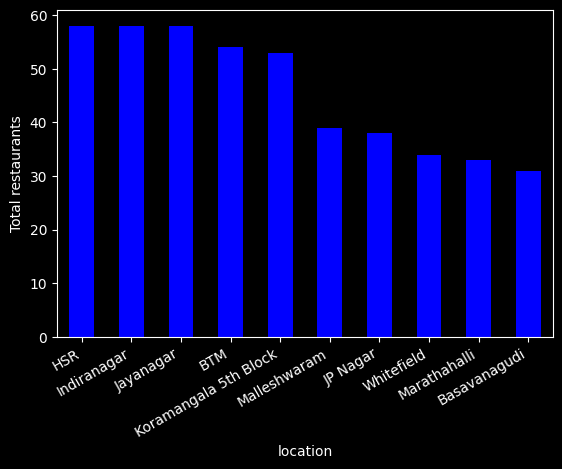

In [975]:
location_df['restaurant'].nlargest(10).plot.bar(color='blue')
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

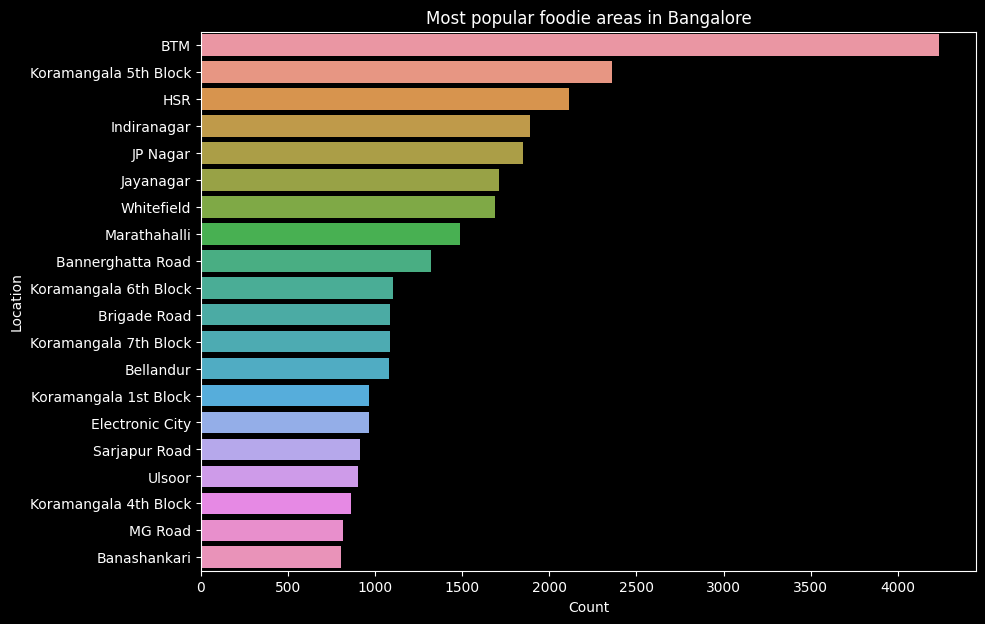

In [976]:
# Which are the foodie areas?
plt.figure(figsize=(10,7))
restaurant_locations = data['location'].value_counts()[:20]
sns.barplot(x=restaurant_locations, y=restaurant_locations.index)
plt.xlabel('Count')
plt.ylabel('Location')
plt.title("Most popular foodie areas in Bangalore")
plt.show()

### Geographical Analysis

In [977]:
data.shape

(43690, 17)

In [978]:
len(data['location'].unique())

92

In [979]:
locations=pd.DataFrame({"Name":data['location'].unique()})

In [980]:
locations['new_Name']='Bangalore '+locations['Name']

In [981]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [982]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [983]:
from geopy.geocoders import Nominatim

In [984]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [985]:
locations['geo_loc']=lat_lon

In [986]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(13.8345913, 75.7339359)"
2,Mysore Road,Bangalore Mysore Road,"(12.9466619, 77.5300896)"
3,Jayanagar,Bangalore Jayanagar,"(27.3493013, 95.3159407)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [987]:
Rest_locations=pd.DataFrame(data['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations.head().style.background_gradient(cmap="Wistia")

,Name,count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [988]:
locations.shape

(92, 3)

In [989]:
Rest_locations.shape

(92, 2)

In [990]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

,Name,count,new_Name,geo_loc
0,BTM,4237,Bangalore BTM,"(12.911275849999999, 77.60456543431182)"
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)"
2,HSR,2113,Bangalore HSR,"(29.1523467, 75.7245798)"
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,Bangalore JP Nagar,"(12.9096941, 77.5866067)"


In [991]:
Restaurant_locations.shape

(91, 4)

In [992]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [993]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map
np.array(Restaurant_locations['geo_loc'])
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [994]:
type(lat)

tuple

In [995]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [996]:
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,4237,Bangalore BTM,"(12.911275849999999, 77.60456543431182)",12.911276,77.604565
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)",12.934843,77.618977
2,HSR,2113,Bangalore HSR,"(29.1523467, 75.7245798)",29.152347,75.724580
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,Bangalore JP Nagar,"(12.9096941, 77.5866067)",12.909694,77.586607


In [998]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [999]:
basemap

In [1000]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[12.911275849999999, 77.60456543431182, 4237.0],
 [12.9348429, 77.6189768, 2358.0],
 [29.1523467, 75.7245798, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.9096941, 77.5866067, 1849.0],
 [27.3493013, 95.3159407, 1711.0],
 [53.5533682, -2.2969019, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.9264624, 77.6004377, 1318.0],
 [12.9390255, 77.6238477, 1103.0],
 [-36.9749456, 174.7825752, 1084.0],
 [12.9364846, 77.6134783, 1084.0],
 [12.93103185, 77.6782471, 1078.0],
 [12.9277245, 77.6327822, 964.0],
 [15.67509025, 73.81083634836561, 963.0],
 [12.9243866, 77.6508897, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.9327778, 77.6294052, 864.0],
 [12.9755264, 77.6067902, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [19.1602288, 76.2772822, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [13.8345913, 75.7339359, 628.0],
 [40.5758225, -74.123824, 626.0],
 [6.6114154, 0.4701931, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.9986827, 77.615525, 574.0],
 [-38.1111828, 142.319447, 550.0],
 [13.00934

In [1001]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [1002]:
basemap

### Predict 4 models

In [1003]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [1004]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [1005]:
#Changing the column names
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [1006]:
#Some Transformations
data['cost'] = data['cost'].astype(str) #Changing the cost to string
data['cost'] = data['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
data['cost'] = data['cost'].astype(float) # Changing the cost to Float
data.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Index: 43690 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           43690 non-null  object 
 1   address       43690 non-null  object 
 2   name          43690 non-null  object 
 3   online_order  43690 non-null  object 
 4   book_table    43690 non-null  object 
 5   rate          43690 non-null  float64
 6   votes         43690 non-null  int64  
 7   phone         43099 non-null  object 
 8   location      43690 non-null  object 
 9   rest_type     43541 non-null  object 
 10  dish_liked    23474 non-null  object 
 11  cuisines      43682 non-null  object 
 12  cost          43690 non-null  float64
 13  reviews_list  43690 non-null  object 
 14  menu_item     43690 non-null  object 
 15  type          43690 non-null  object 
 16  city          43690 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage: 6.0+ MB


In [1007]:
#Reading uninque values from the Rate column
data['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [1008]:
# Lấy các giá trị duy nhất từ cột 'rate'
unique_values = data['rate'].unique()
# Loại bỏ các hàng có giá trị 'NEW' hoặc '-'
data = data.loc[(zomato['rate'] != 'NEW') & (zomato['rate'] != '-')].reset_index(drop=True)
# Định nghĩa hàm lambda để loại bỏ '/5' từ các giá trị trong cột 'rate'
remove_slash = lambda x: x.replace('/5', '') if isinstance(x, str) else x
# Áp dụng hàm remove_slash cho cột 'rate', loại bỏ '/5' và chuyển đổi sang kiểu float
data['rate'] = data['rate'].apply(remove_slash).astype(float)
# In ra một số dòng đầu của cột 'rate' sau khi đã chuyển đổi
print(data['rate'].head())


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


In [1009]:
# Adjust the column names
data.name = data.name.apply(lambda x:x.title())
data.online_order.replace(('Yes','No'),(True, False),inplace=True)
data.book_table.replace(('Yes','No'),(True, False),inplace=True)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [1010]:
data.cost.unique() # cheking the unique costs

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
       1700., 1350., 2200., 1400., 2000., 1800., 1900.,  180.,  330.,
       2500., 2100., 3000., 2800., 3400.,   50.,   40., 1250., 3500.,
       4000., 2400., 2600., 1450.,   70., 3200.,  240., 6000., 1050.,
       2300., 4100.,  120., 5000., 3700., 1650., 2700., 4500.,   80.])

In [1011]:
#Encode the input Variables
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

data = Encode(data.copy())
data.head() # looking at the dataset after transformation

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,0,4.1,775,0,0,0,0,0,800.0,0,0,0,0
1,1,1,1,0,1,4.1,787,1,0,0,1,1,800.0,1,0,0,0
2,2,2,2,0,1,3.8,918,2,0,1,2,2,800.0,2,0,0,0
3,3,3,3,1,1,3.7,88,3,0,2,3,3,300.0,3,0,0,0
4,4,4,4,1,1,3.8,166,4,1,0,4,4,600.0,4,0,0,0


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

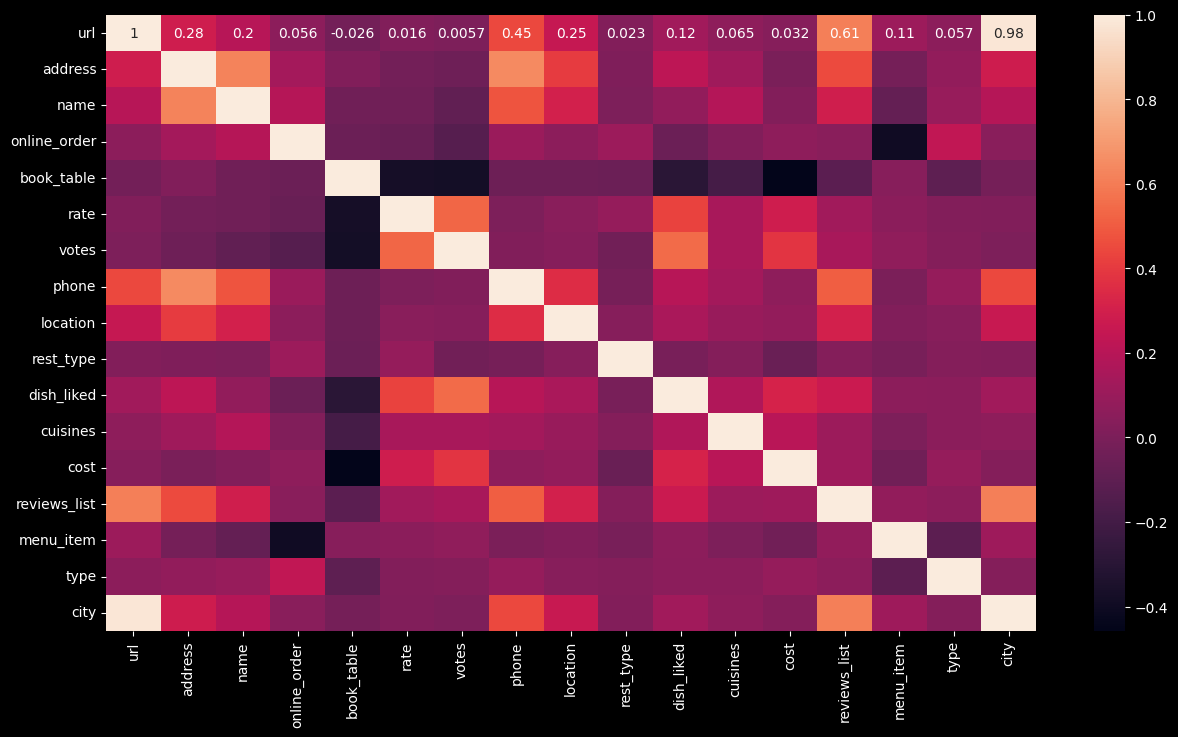

In [1012]:
#Get Correlation between different variables
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

In [1013]:
#Defining the independent variables and dependent variables
x = data.iloc[:,[2,3,5,6,7,8,9,11]]
y = data['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,name,online_order,rate,votes,phone,location,rest_type,cuisines
32997,2880,0,3.5,21,3679,24,0,0
25975,3062,0,3.7,59,3942,21,4,1295
23686,301,0,4.0,169,8696,19,25,187
24850,3335,0,4.4,2394,4368,60,0,1383
31361,5532,1,3.3,6,9700,52,2,2076


In [1014]:
y_train.head()

32997    3.5
25975    3.7
23686    4.0
24850    4.4
31361    3.3
Name: rate, dtype: float64

In [1015]:
data['menu_item'].unique() # seeing the unique values in 'menu_item'

array([   0,    1,    2, ..., 8268, 8269, 8270], dtype=int64)

In [1016]:
data['location'].unique() # seeing the unique values in 'location'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91], dtype=int64)

In [1017]:
data['cuisines'].unique() # seeing the unique values in 'cusines'

array([   0,    1,    2, ..., 2373, 2374, 2375], dtype=int64)

In [1018]:
data['rest_type'].unique() # seeing the unique values in 'rest_type'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, -1, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86], dtype=int64)

In [1019]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,0,4.1,775,0,0,0,0,0,800.0,0,0,0,0
1,1,1,1,0,1,4.1,787,1,0,0,1,1,800.0,1,0,0,0
2,2,2,2,0,1,3.8,918,2,0,1,2,2,800.0,2,0,0,0
3,3,3,3,1,1,3.7,88,3,0,2,3,3,300.0,3,0,0,0
4,4,4,4,1,1,3.8,166,4,1,0,4,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41413,41413,3147,2709,1,1,3.7,34,11997,25,28,-1,204,800.0,4041,0,6,29
41414,41414,8828,1723,1,1,2.5,81,12195,25,28,5211,765,800.0,21153,0,6,29
41415,41415,8762,6557,1,1,3.6,27,12128,25,17,-1,240,1500.0,21027,0,6,29
41416,41416,8823,6593,1,0,4.3,236,12187,56,17,5207,237,2500.0,21125,0,6,29


In [1020]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [1021]:
# Xác định các features và target
features = ['online_order', 'book_table', 'votes', 'cost']  # Chọn các cột làm features
target = 'rate'  # Dự đoán cột 'rate'

In [1022]:
# Chia dữ liệu thành dữ liệu huấn luyện và dữ liệu kiểm tra
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Khởi tạo các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

In [1023]:
# Huấn luyện và đánh giá các mô hình
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} - Mean Squared Error: {mse}")

Linear Regression - Mean Squared Error: 0.14292151459112684
Decision Tree Regression - Mean Squared Error: 0.06505593583374278
Random Forest Regression - Mean Squared Error: 0.06212829441068865
Gradient Boosting Regression - Mean Squared Error: 0.11133531721712236


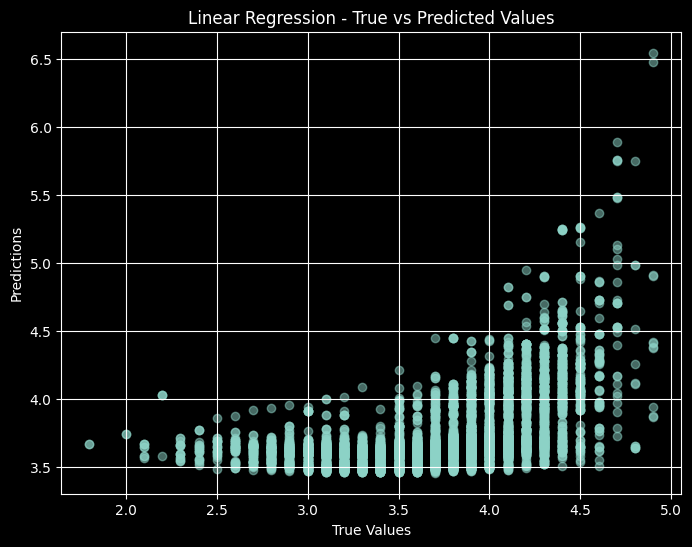

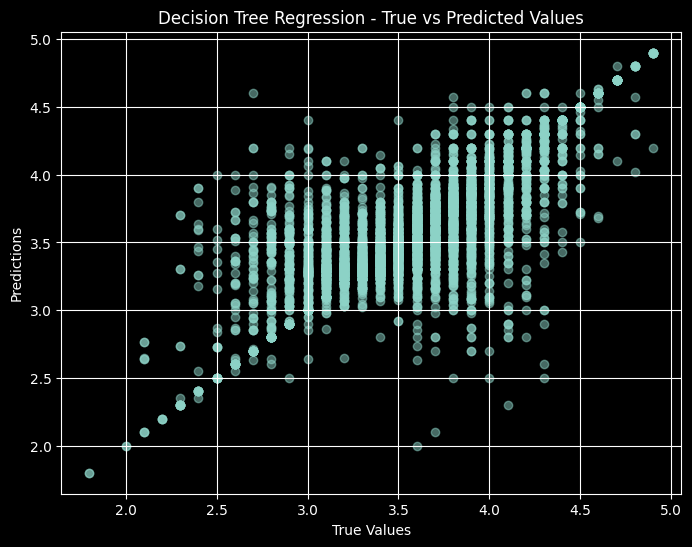

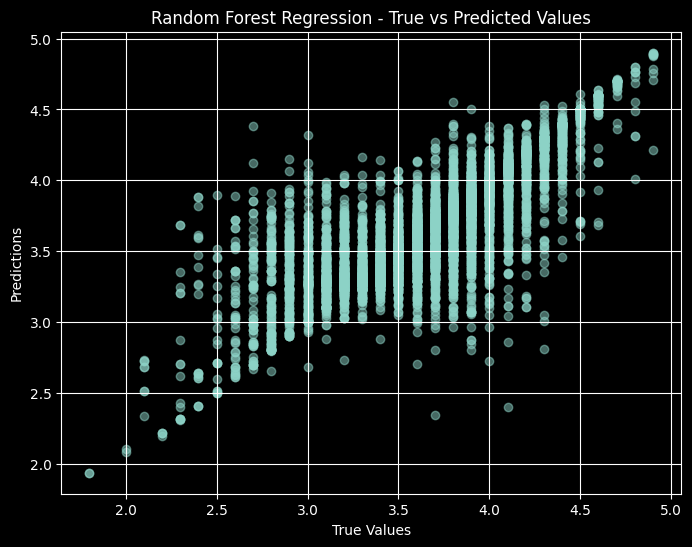

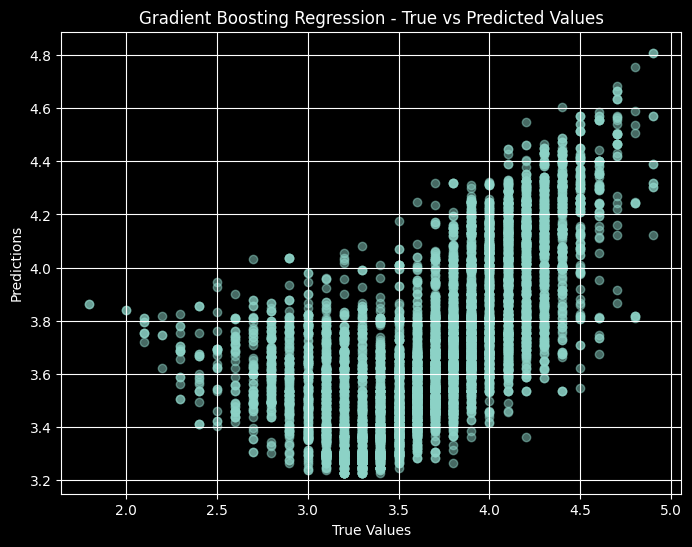

In [1024]:
import matplotlib.pyplot as plt
# Lặp qua các mô hình để vẽ biểu đồ cho từng mô hình
for name, model in models.items():
    # Dự đoán trên dữ liệu kiểm tra
    predictions = model.predict(X_test)
    # Vẽ biểu đồ scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(f"{name} - True vs Predicted Values")
    plt.grid(True)
    plt.show()